# Exploración del Reto

### Importar librerías

In [154]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

### Load the data

In [155]:
data_tracks = pd.read_csv("go_track_tracks.csv")
data_trackpoints = pd.read_csv("go_track_trackspoints.csv")
data_tracks

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
158,38081,24,30.051732,0.218756,6.574,2,0,0,1,carro
159,38082,24,30.173788,0.255387,7.706,3,0,0,1,carro
160,38084,25,1.153772,0.013001,0.015,1,3,2,2,721 - CASTELO BRANCO SUISSA
161,38090,26,0.843223,0.007116,0.006,3,1,2,2,002 - FERNANDO COLLOR DIA


In [156]:
data_trackpoints

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
...,...,...,...,...,...
18102,19565,-10.923722,-37.106579,38092,2016-01-19 13:01:01
18103,19566,-10.923704,-37.106693,38092,2016-01-19 13:01:12
18104,19567,-10.923715,-37.106688,38092,2016-01-19 13:01:24
18105,19568,-10.923715,-37.106688,38092,2016-01-19 13:01:36


### Estadísticas descriptivas de:
* Determinar si hay trayectos "duplicados" (error en el software que envía dos veces el mismo trayecto) que sea conveniente eliminar.
* Utilizar filtros para saber la cantidad exacta de carros y de autobuses que existen. [x]
* Utilizar una función aritmética para obtener la rapidez promedio de todos los carros. [x]
* Utilizar una función aritmética para obtener la rapidez promedio de todos los autobuses. [x]
* Definir qué porcentaje de carros tiene una rapidez promedio inferior a la del promedio general. Generar una gráfica que represente esta información de manera clara. [x]
* Definir qué porcentaje de autobuses tiene una rapidez promedio inferior a la del promedio. Generar una gráfica que represente esta información de manera clara [x]
* Generar una gráfica que compare la rapidez promedio de los carros contra la de los autobuses. [x]
* Utilizar operaciones aritméticas para obtener la rapidez promedio de cada auto y autobús y revisar que coincida con la columna “speed”. [x]
* Definir qué porcentaje de carros enfrentan (a ojos del usuario) un alto nivel de tráfico Generar una gráfica que represente esta información de manera clara  [x]
* Definir qué porcentaje de autobuses enfrentan (a ojos del usuario) un alto nivel de tráfico. Generar una gráfica que represente esta información de manera clara [x]
* Utilizar el condicional SI/IF para obtener el número de carros que enfrentan un alto nivel de tráfico durante un día lluvioso. [x]
* Usar alguna función para definir qué línea de autobús es la más llena. [x]
* Usar alguna función para definir qué línea de autobús es la más vacía. [x]
* Calcular con operaciones aritméticas el desplazamiento total desde el punto inicial (latitud inicial, longitud inicial) hasta el punto final (latitud final, longitud final) de algunos carros. [x]

### Cantidad de autos y autobuses

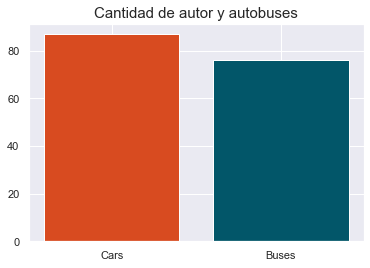

In [157]:
def checkTypeOfCar(automobiles):
    total_cars = 0
    total_buses = 0
    for automobile in automobiles:
        if automobile == 1:
            total_cars += 1
        elif automobile == 2:
            total_buses += 1
        else:
            pass
    return [total_cars,total_buses]

typeOfAutomobiles = checkTypeOfCar(data_tracks["car_or_bus"])
plt.bar(["Cars", "Buses"], typeOfAutomobiles, color=["#D84B20", "#025669"])
plt.title("Cantidad de autor y autobuses",fontsize=15)
plt.show()

### Velocidad promedio de todos los automóviles

In [158]:
average_speed = round(data_tracks["speed"].mean(),2)
print(average_speed, "km/h")

16.7 km/h


#### Carros

In [159]:
def averageSpeed(vehicles, speeds):
    cars = {}
    buses = {}
    counter_cars = 1
    counter_buses = 1
    totalSpeed_cars = 0
    totalSpeed_buses = 0
    for index,typeOfVehicle in enumerate(vehicles):
        speed = speeds[index]
        if typeOfVehicle == 1:
            cars["car_" + str(counter_cars)] = round(speed,3)
            counter_cars += 1
            totalSpeed_cars += speed
        elif typeOfVehicle == 2:
            buses["bus_" + str(counter_buses)] = round(speed,3)
            counter_buses += 1
            totalSpeed_buses += speed
        else:
            pass
    
    average_speed_cars = round(totalSpeed_cars / len(list(cars.values())),2)
    average_speed_buses = round(totalSpeed_buses / len(list(buses.values())),2)
    return [{
        "AverageSpeed_cars": average_speed_cars,
        "AverageSpeed_buses": average_speed_buses
    }, [cars,buses]]
    
        

speedsByType = averageSpeed(data_tracks["car_or_bus"], data_tracks["speed"])  

In [160]:
cars = pd.DataFrame(columns=[["Transportation", "Speed"]])
cars.set_index("Transportation")
cars["Transportation"] = list(speedsByType[1][0].keys())
cars["Speed"] = list(speedsByType[1][0].values())
cars

,Transportation,Speed
0,car_1,19.211
1,car_2,30.848
2,car_3,25.807
3,car_4,1.347
4,car_5,36.851
...,...,...
82,car_83,21.812
83,car_84,23.829
84,car_85,28.337
85,car_86,30.052


In [161]:
buses = pd.DataFrame(columns=[["Transportation", "Speed"]], )
buses.set_index("Transportation")
buses["Transportation"] = list(speedsByType[1][1].keys())
buses["Speed"] = list(speedsByType[1][1].values())

### Car speeds

In [162]:
def belowAverageSpeedCars(speeds,speedMean):
    lower_speed_counter = 0
    for speed in speeds:
        if speed < speedMean:
            lower_speed_counter += 1
        else:
            pass
    return lower_speed_counter

belowAverage_speed_cars = belowAverageSpeedCars(list(speedsByType[1][0].values()),speedsByType[0]["AverageSpeed_cars"]) / len(list(speedsByType[1][1].values()))
print("Porcentage of cars that went below the speed average: " + str(round(belowAverage_speed_cars * 100,2)) + "%")

Porcentage of cars that went below the speed average: 52.63%


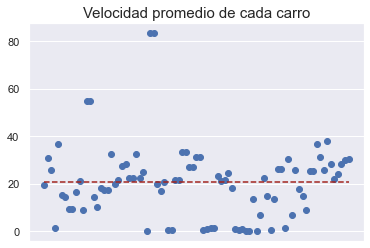

In [163]:
plt.scatter(list(speedsByType[1][0].keys()),list(speedsByType[1][0].values())).axes.get_xaxis().set_visible(False)
plt.plot(list(speedsByType[1][0].keys()),[speedsByType[0]["AverageSpeed_cars"]] * len(list(speedsByType[1][0].keys())),"--" ,color="#A2231D")
plt.title("Velocidad promedio de cada carro",fontsize=15)
plt.show()

### Bus Speeds

In [164]:
def belowAverageSpeedBuses(speeds,speedMean):
    lower_speed_counter = 0
    for speed in speeds:
        if speed < speedMean:
            lower_speed_counter += 1
        else:
            pass
    return lower_speed_counter

belowAverage_speed_buses = belowAverageSpeedBuses(list(speedsByType[1][1].values()),speedsByType[0]["AverageSpeed_buses"]) / len(list(speedsByType[1][1].values()))
print("Porcentage of buses that went below the speed average: " + str(round(belowAverage_speed_buses * 100,2)) + "%")

Porcentage of buses that went below the speed average: 55.26%


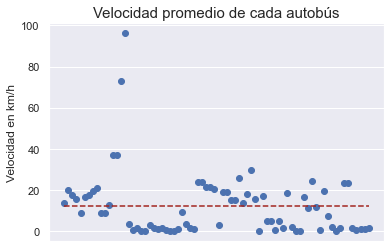

In [165]:
plt.scatter(list(speedsByType[1][1].keys()),list(speedsByType[1][1].values())).axes.get_xaxis().set_visible(False)
plt.plot(list(speedsByType[1][1].keys()),[speedsByType[0]["AverageSpeed_buses"]] * len(list(speedsByType[1][1].keys())),"--" ,color="#A2231D")
plt.title("Velocidad promedio de cada autobús",fontsize=15)
plt.ylabel("Velocidad en km/h")
plt.show()

### Comparación de velocidad promedio entre autobuses y carros

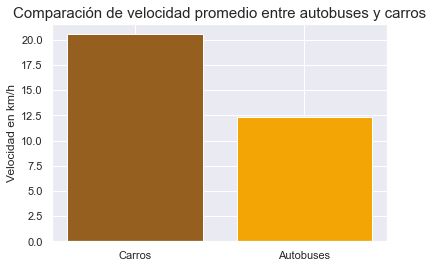

In [166]:
plt.bar(["Carros", "Autobuses"], [speedsByType[0]["AverageSpeed_cars"],speedsByType[0]["AverageSpeed_buses"]],color=["#955F20","#F3A505"])
plt.ylabel("Velocidad en km/h")
plt.title("Comparación de velocidad promedio entre autobuses y carros",fontsize=15)
plt.show()

### Checar velocidades dadas

In [167]:
checkingSpeeds = pd.DataFrame(data_tracks["distance"])
checkingSpeeds["time"] = data_tracks["time"]
checkingSpeeds["given_speed"] = data_tracks["speed"]
def checkingGivenSpeed(distances,times,given_speeds):
    checkingSpeeds = []
    for index, distance in enumerate(distances):
        time = times[index]
        given_speed = given_speeds[index]
        if round((distance / time),3) ==  round(given_speed,3):
            checkingSpeeds.append("Valid")
        else:
            checkingSpeeds.append("Invalid")
    return checkingSpeeds

checkingSpeeds["speed_validation"] = checkingGivenSpeed(list(checkingSpeeds["distance"]), list(checkingSpeeds["time"]), list(checkingSpeeds["given_speed"]))

In [168]:
checkingSpeeds.to_csv("./Visualizaciones/speed_validation.csv")

In [169]:
cars = pd.read_csv("./Visualizaciones/cars_speed.csv")
buses = pd.read_csv("./Visualizaciones/buses_speed.csv")

### Evaluación de tráfico del 1-3

In [170]:
def defineTrafficRating(ratings):
    low = 0
    medium = 0
    high = 0
    for rating in ratings:
        if rating == 1:
            low += 1
        elif rating == 2:
            medium += 1
        elif rating == 3:
            high += 1
    x = ["Low", "Medium", "High"]
    y = [low, medium,high]
    return [x,y]
cars_rating = defineTrafficRating(cars["Rating"])
buses_rating = defineTrafficRating(buses["rating"])

#### Carros

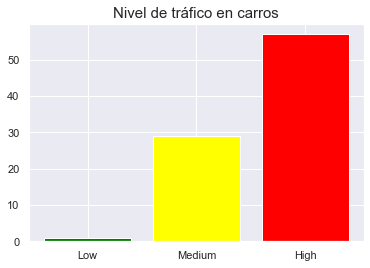

In [171]:
plt.bar(cars_rating[0], cars_rating[1], color=["green", "yellow", "red"])
plt.title("Nivel de tráfico en carros", fontsize=15)
plt.show()

#### Autobuses

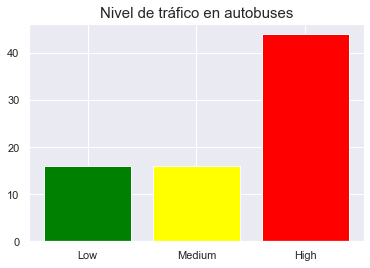

In [172]:
plt.bar(buses_rating[0], buses_rating[1],color=["green", "yellow", "red"])
plt.title("Nivel de tráfico en autobuses", fontsize=15)
plt.show()

### Obteniendo numero de carros que experimentan mucho trafico y un dia lluvioso

In [173]:
def HighTrafficRainyDay(ratings,weatherRatings):
    # 1 = rainy day
    # 2 = sunny day
    people_badLuck = 0
    other = 0
    for index,rating in enumerate(ratings):
        weather = weatherRatings[index]
        if (rating == 3) and (weather == 1):
            people_badLuck += 1
        else:
            other += 1
    return [people_badLuck, other]

peopleWithBadLuck_cars = HighTrafficRainyDay(cars["Rating"], cars["rating_weather"])
peopleWithBadLuck_buses = HighTrafficRainyDay(buses["rating"], buses["rating_weather"])
peopleWithBadLuck_cars

[0, 87]

#### Number of people with bad luck (high traffic with a rainy day)

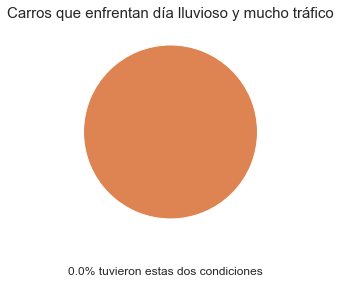

In [174]:
percentage_badLuckcars = (peopleWithBadLuck_cars[0] / (peopleWithBadLuck_cars[0] + peopleWithBadLuck_cars[1])) * 100
plt.pie(peopleWithBadLuck_cars)
plt.title("Carros que enfrentan día lluvioso y mucho tráfico",fontsize=15)
plt.figtext(0.5, 0.01,str(round(percentage_badLuckcars,2)) + "% tuvieron estas dos condiciones" , wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

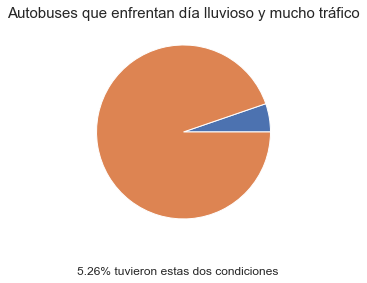

In [175]:
percentage_badLuckbuses = (peopleWithBadLuck_buses[0] / (peopleWithBadLuck_buses[0] + peopleWithBadLuck_buses[1])) * 100
plt.pie(peopleWithBadLuck_buses)
plt.title("Autobuses que enfrentan día lluvioso y mucho tráfico",fontsize=15)
plt.figtext(0.5, 0.01,str(round(percentage_badLuckbuses,2)) + "% tuvieron estas dos condiciones" , wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [176]:
def identifyVehicleLastCoordinates(tracks_id,trackpoints_id,latitudes,longitudes):
    cars_coordinates = {}
    for index,trackpoint in enumerate(trackpoints_id):
        longitude = longitudes[index]
        latitude = latitudes[index]
        if trackpoint in tracks_id:
            cars_coordinates[str(trackpoint)] = [latitude,longitude]
        else:
            pass
    return cars_coordinates

lastCoordinates_cars = identifyVehicleLastCoordinates(list(cars["ID"]), list(data_trackpoints["track_id"]),list(data_trackpoints["latitude"]),list(data_trackpoints["longitude"])) 
lastCoordinates_buses = identifyVehicleLastCoordinates(list(buses["ID"]), list(data_trackpoints["track_id"]),list(data_trackpoints["latitude"]),list(data_trackpoints["longitude"]))
lastCoordinates_buses

{'3': [-10.90887499, -37.05050216],
 '4': [-10.92420939, -37.10468552],
 '12': [-10.90885085, -37.0512062],
 '13': [-10.92376114, -37.10506548],
 '14': [-10.89686935, -37.05346637],
 '18': [-10.90299921, -37.05002435],
 '19': [-10.92139071, -37.1000928],
 '24': [-10.92462, -37.1046883333333],
 '25': [-10.9881016666667, -37.052535],
 '26': [-10.9257183333333, -37.103215],
 '27': [-10.9257183333333, -37.103215],
 '33': [-10.9222754, -37.09767894],
 '49': [-10.9222296, -37.097166],
 '50': [-10.9222296, -37.097166],
 '51': [-10.99229328, -37.53211574],
 '58': [-10.9222686, -37.0990955],
 '61': [-10.89681949, -37.05352899],
 '63': [-10.89684121, -37.05353753],
 '65': [-10.89680199, -37.05348913],
 '67': [-10.89679782, -37.05358669],
 '70': [-10.8968087, -37.05351538],
 '71': [-10.89681431, -37.05351961],
 '78': [-10.89680933, -37.05350889],
 '99': [-10.89679119, -37.05361728],
 '128': [-10.89684307, -37.0535966],
 '155': [-10.89686831, -37.05352479],
 '157': [-10.9756044, -37.04720568],
 '1

In [177]:
def identifyVehicleFirstCoordinates(tracks_id,trackpoints_id,latitudes,longitudes):
    cars_coordinates = {}
    cars_coordinates[str(tracks_id[0])] = [latitudes[0], longitudes[0]]
    for index,trackpoint in enumerate(trackpoints_id):
        longitude = longitudes[index]
        latitude = latitudes[index]
        if trackpoint in tracks_id:
            if str(trackpoint) not in cars_coordinates.keys():
                cars_coordinates[str(trackpoint)] = [latitude,longitude]
        else:
            pass
    return cars_coordinates

firstCoordinates_cars = identifyVehicleFirstCoordinates(list(cars["ID"]), list(data_trackpoints["track_id"]),list(data_trackpoints["latitude"]),list(data_trackpoints["longitude"]))
firstCoordinates_buses = identifyVehicleFirstCoordinates(list(buses["ID"]), list(data_trackpoints["track_id"]),list(data_trackpoints["latitude"]),list(data_trackpoints["longitude"]))
firstCoordinates_buses

{'3': [-10.9393413858164, -37.0627421097422],
 '4': [-10.90889296, -37.05237154],
 '12': [-10.90542032, -37.04819449],
 '13': [-10.90885896, -37.05223934],
 '14': [-10.89686935, -37.05346637],
 '18': [-10.89739402, -37.05800206],
 '19': [-10.91123058, -37.05267365],
 '24': [-10.9235383333333, -37.0809266666667],
 '25': [-10.9172966666667, -37.087255],
 '26': [-10.9876966666667, -37.0523616666667],
 '27': [-10.9876966666667, -37.0523616666667],
 '33': [-10.9088832, -37.05223326],
 '49': [-10.9295316, -37.0670892],
 '50': [-10.9295316, -37.0670892],
 '51': [-10.99013389, -37.53588639],
 '58': [-10.9287803, -37.0664648],
 '61': [-10.8967926, -37.05351068],
 '63': [-10.89687711, -37.05360013],
 '65': [-10.89681579, -37.05354392],
 '67': [-10.89680977, -37.05350849],
 '70': [-10.89680486, -37.05357979],
 '71': [-10.89681431, -37.05351961],
 '78': [-10.89682828, -37.05352295],
 '99': [-10.89685371, -37.05353246],
 '128': [-10.89685835, -37.05355699],
 '155': [-10.89686874, -37.05354375],
 '1

In [178]:
def calculateDisplacement(firstCoordinates,secondCoordinates):
    #first[x1,y1] and second[x2,y2]
    car_displacements = []
    for index, first in enumerate(firstCoordinates):
        second = secondCoordinates[index]
        x1 = first[0]
        x2 = second[0]
        y1 = first[1]
        y2 = second[1]
        d = np.sqrt(np.square(x2 - x1) + np.square(y2-y1))
        car_displacements.append(d)
    return car_displacements

carsDisplacements = calculateDisplacement(list(firstCoordinates_cars.values()),list(lastCoordinates_cars.values()))
busesDisplacements = calculateDisplacement(list(firstCoordinates_buses.values()),list(lastCoordinates_buses.values()))

In [179]:
cars["Displacements"] = carsDisplacements
buses["Displacements"] = busesDisplacements

In [180]:
def checkBusLines(busLines):
    f_busLines = {}
    realDic = {}
    for busLine in busLines:
        if busLine not in f_busLines:
            f_busLines[busLine] = 1
        elif busLine in f_busLines:
            f_busLines[busLine] += 1
        else:
            pass
    for i in sorted(f_busLines):
        realDic[i] = f_busLines[i]
    return realDic 

busLinesFrequency = checkBusLines(list(buses["linha"].dropna()))

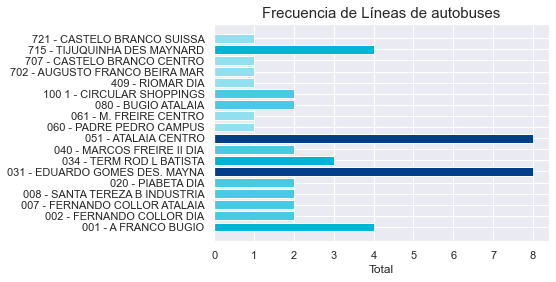

In [181]:
plt.barh(list(busLinesFrequency.keys()),list(busLinesFrequency.values()), color= ["#00b4d8","#48cae4","#48cae4","#48cae4","#48cae4","#023e8a","#00b4d8","#48cae4","#023e8a","#90e0ef","#90e0ef","#48cae4","#48cae4","#90e0ef","#90e0ef","#90e0ef","#00b4d8","#90e0ef",])
plt.title("Frecuencia de Líneas de autobuses", fontsize=15)
plt.xlabel("Total")
plt.show()

### Checar fecha de partida y llegada de autobuses

In [182]:
def arrivalTimesBuses(trackpoints_id,buses_id, times):
    arrivalTimes = {}
    for index, trackpoint in enumerate(trackpoints_id):
        time = times[index]
        if trackpoint in buses_id:
            arrivalTimes["bus_" + str(trackpoint)] = time
        else:
            pass
    return arrivalTimes


def departureTimesBuses(trackpoints_id,buses_id, times):
    departureTimes = {}
    for index, trackpoint in enumerate(trackpoints_id):
        time = times[index]
        if trackpoint in buses_id:
            if str(trackpoint) not in departureTimes.keys():
                departureTimes[str(trackpoint)] = time
            else:
                pass
        else:
            pass
    return departureTimes

arrivalTimesBuses = arrivalTimesBuses(list(data_trackpoints["track_id"]),list(buses["ID"]), list(data_trackpoints["time"])) 
departureTimesBuses = departureTimesBuses(list(data_trackpoints["track_id"]),list(buses["ID"]), list(data_trackpoints["time"])) 

In [183]:
buses["Fecha de salida"] = list(departureTimesBuses.values())
buses["Fecha de llegada"] = list(arrivalTimesBuses.values())

In [184]:
buses

,ID,Transportation,Speed,rating,rating_bus,rating_weather,linha,Displacements,Fecha de salida,Fecha de llegada
0,3,bus_1,13.560,3,0,0,NaN,0.032833,2014-09-17 05:09:23,2014-09-17 05:13:17
1,4,bus_2,19.767,3,0,0,NaN,0.054510,2014-09-17 05:09:23,2014-09-17 05:36:34
2,12,bus_3,17.405,3,0,0,NaN,0.004565,2014-09-30 10:07:32,2014-09-30 10:09:50
3,13,bus_4,15.395,3,0,0,NaN,0.054888,2014-09-30 10:16:20,2014-09-30 10:47:51
4,14,bus_5,8.903,2,0,0,NaN,0.000000,2014-10-08 10:20:38,2014-10-08 10:20:38
...,...,...,...,...,...,...,...,...,...,...
71,38064,bus_72,1.445,3,2,2,707 - CASTELO BRANCO CENTRO,0.001142,2015-10-23 19:00:59,2015-10-23 19:06:07
72,38069,bus_73,0.536,3,1,2,001 - A FRANCO BUGIO,0.000076,2015-11-03 13:22:22,2015-11-03 13:23:09
73,38084,bus_74,1.154,1,3,2,721 - CASTELO BRANCO SUISSA,0.000134,2015-12-16 21:43:16,2015-12-16 21:43:50
74,38090,bus_75,0.843,3,1,2,002 - FERNANDO COLLOR DIA,0.000000,2016-01-03 00:58:12,2016-01-03 00:58:23


In [187]:
cars.to_csv("cars_data.csv")

In [188]:
buses.to_csv("buses_data.csv")